In [1]:
from datetime import date,timedelta
from nsepy import get_history
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
names = ['3MINDIA.NS', 'ACC.NS', 'AIAENG.NS', 'APLAPOLLO.NS', 'AUBANK.NS', 'AARTIIND.NS', 'AAVAS.NS', 'ABBOTINDIA.NS', 'ADANIGAS.NS',
         'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ADANITRANS.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ADVENZYMES.NS',
         'AEGISCHEM.NS', 'AFFLE.NS', 'AJANTPHARM.NS', 'AKZOINDIA.NS', 'APLLTD.NS', 'ALKEM.NS', 'ALLCARGO.NS', 'AMARAJABAT.NS',
         'AMBER.NS', 'AMBUJACEM.NS', 'APOLLOHOSP.NS', 'APOLLOTYRE.NS', 'ARVINDFASN.NS', 'ASAHIINDIA.NS', 'ASHOKLEY.NS',
         'ASHOKA.NS', 'ASIANPAINT.NS', 'ASTERDM.NS', 'ASTRAZEN.NS', 'ASTRAL.NS', 'ATUL.NS', 'AUROPHARMA.NS', 'AVANTIFEED.NS', 
         'DMART.NS', 'AXISBANK.NS', 'BASF.NS', 'BEML.NS', 'BSE.NS', 'BAJAJ-AUTO.NS', 'BAJAJCON.NS', 'BAJAJELEC.NS', 'BAJFINANCE.NS', 
         'BAJAJFINSV.NS', 'BAJAJHLDNG.NS', 'BALKRISIND.NS', 'BALMLAWRIE.NS', 'BALRAMCHIN.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 
         'BANKINDIA.NS', 'MAHABANK.NS', 'BATAINDIA.NS', 'BAYERCROP.NS', 'BERGEPAINT.NS', 'BDL.NS', 'BEL.NS', 'BHARATFORG.NS',
         'BHEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'INFRATEL.NS', 'BIOCON.NS', 'BIRLACORPN.NS', 'BSOFT.NS', 'BLISSGVS.NS', 
         'BLUEDART.NS', 'BLUESTARCO.NS', 'BBTC.NS', 'BOMDYEING.NS', 'BOSCHLTD.NS', 'BRIGADE.NS', 'BRITANNIA.NS', 'CARERATING.NS', 
         'CCL.NS', 'CESC.NS', 'CRISIL.NS', 'CADILAHC.NS', 'CANFINHOME.NS', 'CANBK.NS', 'CAPLIPOINT.NS', 'CGCL.NS', 'CARBORUNIV.NS', 
         'CASTROLIND.NS', 'CEATLTD.NS', 'CENTRALBK.NS', 'CDSL.NS', 'CENTURYPLY.NS', 'CERA.NS', 'CHALET.NS', 'CHAMBLFERT.NS', 
         'CHENNPETRO.NS', 'CHOLAHLDNG.NS', 'CHOLAFIN.NS', 'CIPLA.NS', 'CUB.NS', 'COALINDIA.NS', 'COCHINSHIP.NS', 'COLPAL.NS', 
         'CONCOR.NS', 'COROMANDEL.NS', 'CREDITACC.NS', 'CROMPTON.NS', 'CUMMINSIND.NS', 'CYIENT.NS', 'DBCORP.NS', 'DCBBANK.NS',
         'DCMSHRIRAM.NS', 'DLF.NS', 'DABUR.NS', 'DALBHARAT.NS', 'DEEPAKNTR.NS', 'DELTACORP.NS', 'DHFL.NS', 'DBL.NS', 'DISHTV.NS', 
         'DCAL.NS', 'DIVISLAB.NS', 'DIXON.NS', 'LALPATHLAB.NS', 'DRREDDY.NS', 'EIDPARRY.NS', 'EIHOTEL.NS', 'EDELWEISS.NS', 'EICHERMOT.NS', 
         'ELGIEQUIP.NS', 'EMAMILTD.NS', 'ENDURANCE.NS', 'ENGINERSIN.NS', 'EQUITAS.NS', 'ERIS.NS', 'ESCORTS.NS', 'ESSELPACK.NS', 
         'EXIDEIND.NS', 'FDC.NS', 'FEDERALBNK.NS', 'FMGOETZE.NS', 'FINEORG.NS', 'FINCABLES.NS', 'FINPIPE.NS', 'FSL.NS', 
         'FORTIS.NS', 'FCONSUMER.NS', 'FLFL.NS', 'FRETAIL.NS', 'GAIL.NS', 'GEPIL.NS', 'GET&D.NS', 'GHCL.NS', 'GMRINFRA.NS',
         'GALAXYSURF.NS', 'GARFIBRES.NS', 'GAYAPROJ.NS', 'GICRE.NS', 'GILLETTE.NS', 'GLAXO.NS', 'GLENMARK.NS', 
         'GODFRYPHLP.NS', 'GODREJAGRO.NS', 'GODREJCP.NS', 'GODREJIND.NS', 'GODREJPROP.NS', 'GRANULES.NS', 'GRAPHITE.NS', 
         'GRASIM.NS', 'GESHIP.NS', 'GREAVESCOT.NS', 'GRINDWELL.NS', 'GUJALKALI.NS', 'GUJGASLTD.NS', 'GMDCLTD.NS', 
         'GNFC.NS', 'GPPL.NS', 'GSFC.NS', 'GSPL.NS', 'GULFOILLUB.NS', 'HEG.NS', 'HCLTECH.NS', 'HDFCAMC.NS', 
         'HDFCBANK.NS', 'HDFCLIFE.NS', 'HFCL.NS', 'HATSUN.NS', 'HAVELLS.NS', 'HEIDELBERG.NS', 'HERITGFOOD.NS', 
         'HEROMOTOCO.NS', 'HEXAWARE.NS', 'HSCL.NS', 'HIMATSEIDE.NS', 'HINDALCO.NS', 'HAL.NS', 'HINDCOPPER.NS', 
         'HINDPETRO.NS', 'HINDUNILVR.NS', 'HINDZINC.NS', 'HONAUT.NS', 'HUDCO.NS', 'HDFC.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 
         'ISEC.NS', 'ICRA.NS', 'IDBI.NS', 'IDFCFIRSTB.NS', 'IDFC.NS', 'IFBIND.NS', 'IFCI.NS', 'IIFL.NS', 'IRB.NS', 'IRCON.NS', 'ITC.NS', 
         'ITDCEM.NS', 'ITI.NS', 'INDIACEM.NS', 'ITDC.NS', 'IBULHSGFIN.NS', 'IBULISL.NS', 'IBREALEST.NS', 'IBVENTURES.NS', 'INDIAMART.NS',
         'INDIANB.NS', 'IEX.NS', 'INDHOTEL.NS', 'IOC.NS', 'IOB.NS', 'INDOSTAR.NS', 'IGL.NS', 'INDUSINDBK.NS', 'INFIBEAM.NS', 
         'NAUKRI.NS', 'INFY.NS', 'INOXLEISUR.NS', 'INTELLECT.NS', 'INDIGO.NS', 'IPCALAB.NS', 'JBCHEPHARM.NS', 'JKCEMENT.NS', 
         'JKLAKSHMI.NS', 'JKPAPER.NS', 'JKTYRE.NS', 'JMFINANCIL.NS', 'JSWENERGY.NS', 'JSWSTEEL.NS', 'JAGRAN.NS', 
         'JAICORPLTD.NS', 'JISLJALEQS.NS', 'J&KBANK.NS', 'JAMNAAUTO.NS', 'JINDALSAW.NS', 'JSLHISAR.NS', 'JSL.NS', 
         'JINDALSTEL.NS', 'JCHAC.NS', 'JUBLFOOD.NS', 'JUBILANT.NS', 'JUSTDIAL.NS', 'JYOTHYLAB.NS', 'KPRMILL.NS', 'KEI.NS', 
         'KNRCON.NS', 'KPITTECH.NS', 'KRBL.NS', 'KAJARIACER.NS', 'KALPATPOWR.NS', 'KANSAINER.NS', 'KTKBANK.NS', 
         'KARURVYSYA.NS', 'KSCL.NS', 'KEC.NS', 'KENNAMET.NS', 'KIRLOSENG.NS', 'KOLTEPATIL.NS', 'KOTAKBANK.NS', 'L&TFH.NS', 'LTTS.NS',
         'LICHSGFIN.NS', 'LAXMIMACH.NS', 'LAKSHVILAS.NS', 'LTI.NS', 'LT.NS', 'LAURUSLABS.NS', 'LEMONTREE.NS', 'LINDEINDIA.NS', 'LUPIN.NS', 
         'LUXIND.NS', 'MASFIN.NS', 'MMTC.NS', 'MOIL.NS', 'MRF.NS', 'MAGMA.NS', 'MGL.NS', 'MAHSCOOTER.NS', 'MAHSEAMLES.NS', 'M&MFIN.NS',
         'M&M.NS', 'MAHINDCIE.NS', 'MHRIL.NS', 'MAHLOG.NS', 'MANAPPURAM.NS', 'MRPL.NS', 'MARICO.NS', 'MARUTI.NS', 'MFSL.NS', 'METROPOLIS.NS', 
         'MINDTREE.NS', 'MINDACORP.NS', 'MINDAIND.NS', 'MIDHANI.NS', 'MOTHERSUMI.NS', 'MOTILALOFS.NS', 'MPHASIS.NS', 'MCX.NS', 'MUTHOOTFIN.NS', 'NATCOPHARM.NS', 
         'NBCC.NS', 'NCC.NS', 'NESCO.NS', 'NHPC.NS', 'NIITTECH.NS', 'NLCINDIA.NS', 'NMDC.NS', 'NTPC.NS', 'NH.NS', 'NATIONALUM.NS', 'NFL.NS',
         'NBVENTURES.NS', 'NAVINFLUOR.NS', 'NESTLEIND.NS', 'NETWORK18.NS', 'NILKAMAL.NS', 'NAM-INDIA.NS', 'OBEROIRLTY.NS', 'ONGC.NS', 'OIL.NS', 'OMAXE.NS',
         'OFSS.NS', 'ORIENTCEM.NS', 'ORIENTELEC.NS', 'ORIENTREF.NS', 'PCJEWELLER.NS', 'PIIND.NS', 'PNBHOUSING.NS', 'PNCINFRA.NS', 'PTC.NS', 'PVR.NS', 
         'PAGEIND.NS', 'PARAGMILK.NS', 'PERSISTENT.NS', 'PETRONET.NS', 
         'PFIZER.NS', 'PHILIPCARB.NS', 'PHOENIXLTD.NS', 'PIDILITIND.NS', 'PEL.NS', 'POLYCAB.NS', 'PFC.NS', 'POWERGRID.NS', 'PRAJIND.NS', 'PRESTIGE.NS', 
         'PRSMJOHNSN.NS', 'PGHL.NS', 'PGHH.NS', 'PNB.NS', 'QUESS.NS', 'RBLBANK.NS', 'RECLTD.NS', 'RITES.NS', 'RADICO.NS', 'RVNL.NS', 'RAIN.NS', 'RAJESHEXPO.NS',
         'RALLIS.NS', 'RCF.NS', 'RATNAMANI.NS', 'RAYMOND.NS', 'REDINGTON.NS', 'RELAXO.NS', 'RELCAPITAL.NS', 'RELIANCE.NS', 'RELINFRA.NS', 'RPOWER.NS', 'REPCOHOME.NS', 
         'RESPONIND.NS', 'SHK.NS', 'SBILIFE.NS', 'SJVN.NS', 'SKFINDIA.NS', 'SRF.NS', 'SADBHAV.NS', 'SANOFI.NS', 'SCHAEFFLER.NS', 'SIS.NS', 'SFL.NS', 'SHILPAMED.NS', 'SHOPERSTOP.NS', 'SHREECEM.NS', 
         'RENUKA.NS', 'SHRIRAMCIT.NS', 'SRTRANSFIN.NS', 'SIEMENS.NS', 'SOBHA.NS', 'SOLARINDS.NS', 'SONATSOFTW.NS', 'SOUTHBANK.NS', 'SPANDANA.NS', 'SPICEJET.NS', 'STARCEMENT.NS', 'SBIN.NS', 'SAIL.NS', 'SWSOLAR.NS', 'STRTECH.NS', 
         'STAR.NS', 'SUDARSCHEM.NS', 'SPARC.NS', 'SUNPHARMA.NS', 'SUNTV.NS', 'SUNCLAYLTD.NS', 'SUNDARMFIN.NS', 'SUNDRMFAST.NS', 'SUNTECK.NS', 'SUPRAJIT.NS', 'SUPREMEIND.NS', 'SUZLON.NS', 'SWANENERGY.NS',
         'SYMPHONY.NS', 'SYNGENE.NS', 'TCIEXP.NS', 'TCNSBRANDS.NS', 'TTKPRESTIG.NS', 'TVTODAY.NS', 'TV18BRDCST.NS', 'TVSMOTOR.NS', 'TAKE.NS', 'TASTYBITE.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAELXSI.NS', 
         'TATAINVEST.NS', 'TATAMTRDVR.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTLBSL.NS', 'TATASTEEL.NS', 'TEAMLEASE.NS', 'TECHM.NS', 'TECHNOE.NS', 'NIACL.NS', 'RAMCOCEM.NS', 'THERMAX.NS', 
         'THYROCARE.NS', 'TIMETECHNO.NS', 'TIMKEN.NS', 'TITAN.NS', 'TORNTPHARM.NS', 'TORNTPOWER.NS', 'TRENT.NS', 'TRIDENT.NS', 'TRITURBINE.NS', 'TIINDIA.NS', 'UCOBANK.NS', 'UFLEX.NS', 'UPL.NS', 
         'UJJIVAN.NS', 'ULTRACEMCO.NS', 'UNIONBANK.NS', 'UBL.NS', 'MCDOWELL-N.NS', 'VGUARD.NS', 'VMART.NS',
         'VIPIND.NS', 'VRLLOG.NS', 'VSTIND.NS', 'WABAG.NS', 'VAIBHAVGBL.NS', 'VAKRANGEE.NS', 'VTL.NS', 'VARROC.NS', 'VBL.NS', 'VEDL.NS', 
         'VENKEYS.NS', 'VINATIORGA.NS', 'IDEA.NS', 'VOLTAS.NS', 'WABCOINDIA.NS', 'WELCORP.NS', 'WELSPUNIND.NS', 'WESTLIFE.NS', 'WHIRLPOOL.NS', 'WIPRO.NS', 'WOCKPHARMA.NS', 'ZEEL.NS', 'ZENSARTECH.NS', 'ZYDUSWELL.NS', 'ECLERX.NS']

In [3]:
"""names = ['ADANIPORTS.NS','ASIANPAINT.NS','AXISBANK.NS','BAJAJ-AUTO.NS','BAJFINANCE.NS','BAJAJFINSV.NS',
'BPCL.NS','BHARTIARTL.NS','INFRATEL.NS',
'BRITANNIA.NS','CIPLA.NS','COALINDIA.NS','DRREDDY.NS','EICHERMOT.NS','GAIL.NS','GRASIM.NS','HCLTECH.NS','HDFCBANK.NS','HEROMOTOCO.NS','HINDALCO.NS',
'HINDUNILVR.NS','HDFC.NS','ICICIBANK.NS',
'ITC.NS','IOC.NS','INDUSINDBK.NS','INFY.NS','JSWSTEEL.NS','KOTAKBANK.NS','LT.NS','M&M.NS','MARUTI.NS',
'NTPC.NS','NESTLEIND.NS','ONGC.NS','POWERGRID.NS',
'RELIANCE.NS','SHREECEM.NS','SBIN.NS','SUNPHARMA.NS',
'TCS.NS','TATAMOTORS.NS','TATASTEEL.NS','TECHM.NS','TITAN.NS','UPL.NS','ULTRACEMCO.NS',
'VEDL.NS','WIPRO.NS','ZEEL.NS']"""

"names = ['ADANIPORTS.NS','ASIANPAINT.NS','AXISBANK.NS','BAJAJ-AUTO.NS','BAJFINANCE.NS','BAJAJFINSV.NS',\n'BPCL.NS','BHARTIARTL.NS','INFRATEL.NS',\n'BRITANNIA.NS','CIPLA.NS','COALINDIA.NS','DRREDDY.NS','EICHERMOT.NS','GAIL.NS','GRASIM.NS','HCLTECH.NS','HDFCBANK.NS','HEROMOTOCO.NS','HINDALCO.NS',\n'HINDUNILVR.NS','HDFC.NS','ICICIBANK.NS',\n'ITC.NS','IOC.NS','INDUSINDBK.NS','INFY.NS','JSWSTEEL.NS','KOTAKBANK.NS','LT.NS','M&M.NS','MARUTI.NS',\n'NTPC.NS','NESTLEIND.NS','ONGC.NS','POWERGRID.NS',\n'RELIANCE.NS','SHREECEM.NS','SBIN.NS','SUNPHARMA.NS',\n'TCS.NS','TATAMOTORS.NS','TATASTEEL.NS','TECHM.NS','TITAN.NS','UPL.NS','ULTRACEMCO.NS',\n'VEDL.NS','WIPRO.NS','ZEEL.NS']"

In [4]:
start_year = 2019
end_year = 2020
today = str(date.today()+ timedelta(days=1))
numb = list(map(int,today.split("-")))
data = {}
for i in names:
    data[i] = yf.download(i,start=date(start_year,1,1),end=date(numb[0],numb[1],numb[2]))
    data[i] = data[i].loc[~data[i].index.duplicated(keep='first')]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
window_fast = 10
window_slow = 20
tickers_ret = {}
tickers_signal = {}
for i in names:
    data[i]["FMA"] = data[i]['Close'].ewm(span = window_fast).mean()
    data[i]["SMA"] = data[i]['Close'].ewm(span = window_slow).mean()
    tickers_ret[i] = []
    tickers_signal[i] = ""

In [6]:
"""Buying at buy signal and selling at sell signal 10000 worth of stock 
    keeping profit aside and no addition of money in between
    Also if ending with a buy signal liquidationg it at last price in dataset
"""

for ticker in names:
    #print("calculating daily returns for ",ticker)
    for j in range(len(data[ticker])):
        if tickers_signal[ticker] == "":
            tickers_ret[ticker].append(0)
            if data[ticker]["FMA"][j-1] <= data[ticker]["SMA"][j-1] and data[ticker]["FMA"][j] > data[ticker]["SMA"][j]:
                tickers_signal[ticker] = "Buy"
                print(ticker)
                print(data[ticker].index[j])
                
                
        elif tickers_signal[ticker] == "Buy":
            tickers_ret[ticker].append((data[ticker]["Adj Close"][j]/data[ticker]["Adj Close"][j-1])-1)
            if data[ticker]["FMA"][j-1] >= data[ticker]["SMA"][j-1] and data[ticker]["FMA"][j] < data[ticker]["SMA"][j]:
                tickers_signal[ticker] = ""
    #print(len(data[ticker]))
    #print(len(tickers_ret[ticker])) 
    #data[ticker]["ret"] = np.array(tickers_ret[ticker])

3MINDIA.NS
2019-01-07 00:00:00
3MINDIA.NS
2019-02-07 00:00:00
3MINDIA.NS
2019-05-28 00:00:00
3MINDIA.NS
2019-06-24 00:00:00
3MINDIA.NS
2019-10-16 00:00:00
3MINDIA.NS
2020-01-14 00:00:00
3MINDIA.NS
2020-04-17 00:00:00
3MINDIA.NS
2020-06-17 00:00:00
ACC.NS
2019-01-16 00:00:00
ACC.NS
2019-02-28 00:00:00
ACC.NS
2019-05-23 00:00:00
ACC.NS
2019-07-16 00:00:00
ACC.NS
2019-07-22 00:00:00
ACC.NS
2019-08-14 00:00:00
ACC.NS
2019-09-20 00:00:00
ACC.NS
2019-10-31 00:00:00
ACC.NS
2019-12-02 00:00:00
ACC.NS
2020-01-10 00:00:00
ACC.NS
2020-04-20 00:00:00
AIAENG.NS
2019-01-03 00:00:00
AIAENG.NS
2019-01-15 00:00:00
AIAENG.NS
2019-01-18 00:00:00
AIAENG.NS
2019-02-12 00:00:00
AIAENG.NS
2019-02-22 00:00:00
AIAENG.NS
2019-04-09 00:00:00
AIAENG.NS
2019-05-29 00:00:00
AIAENG.NS
2019-06-28 00:00:00
AIAENG.NS
2019-09-20 00:00:00
AIAENG.NS
2019-12-27 00:00:00
AIAENG.NS
2020-01-08 00:00:00
AIAENG.NS
2020-04-24 00:00:00
AIAENG.NS
2020-07-10 00:00:00
APLAPOLLO.NS
2019-01-02 00:00:00
APLAPOLLO.NS
2019-01-18 00:00:00

ASHOKA.NS
2020-04-21 00:00:00
ASHOKA.NS
2020-06-17 00:00:00
ASIANPAINT.NS
2019-01-02 00:00:00
ASIANPAINT.NS
2019-01-31 00:00:00
ASIANPAINT.NS
2019-03-13 00:00:00
ASIANPAINT.NS
2019-06-03 00:00:00
ASIANPAINT.NS
2019-07-19 00:00:00
ASIANPAINT.NS
2019-09-20 00:00:00
ASIANPAINT.NS
2019-12-18 00:00:00
ASIANPAINT.NS
2020-01-13 00:00:00
ASIANPAINT.NS
2020-03-06 00:00:00
ASIANPAINT.NS
2020-04-17 00:00:00
ASIANPAINT.NS
2020-06-01 00:00:00
ASIANPAINT.NS
2020-06-23 00:00:00
ASTERDM.NS
2019-01-07 00:00:00
ASTERDM.NS
2019-03-14 00:00:00
ASTERDM.NS
2019-03-18 00:00:00
ASTERDM.NS
2019-03-22 00:00:00
ASTERDM.NS
2019-05-30 00:00:00
ASTERDM.NS
2019-09-16 00:00:00
ASTERDM.NS
2019-10-22 00:00:00
ASTERDM.NS
2020-06-04 00:00:00
ASTRAZEN.NS
2019-01-04 00:00:00
ASTRAZEN.NS
2019-06-28 00:00:00
ASTRAZEN.NS
2019-09-05 00:00:00
ASTRAZEN.NS
2020-01-30 00:00:00
ASTRAZEN.NS
2020-02-10 00:00:00
ASTRAZEN.NS
2020-04-07 00:00:00
ASTRAZEN.NS
2020-07-21 00:00:00
ASTRAL.NS
2019-01-02 00:00:00
ASTRAL.NS
2019-02-05 00:00:00


BHEL.NS
2019-10-23 00:00:00
BHEL.NS
2020-01-16 00:00:00
BHEL.NS
2020-05-07 00:00:00
BHEL.NS
2020-05-13 00:00:00
BPCL.NS
2019-01-21 00:00:00
BPCL.NS
2019-03-05 00:00:00
BPCL.NS
2019-05-02 00:00:00
BPCL.NS
2019-05-16 00:00:00
BPCL.NS
2019-06-27 00:00:00
BPCL.NS
2019-08-30 00:00:00
BPCL.NS
2020-02-05 00:00:00
BPCL.NS
2020-04-20 00:00:00
BPCL.NS
2020-06-01 00:00:00
BHARTIARTL.NS
2019-01-04 00:00:00
BHARTIARTL.NS
2019-02-25 00:00:00
BHARTIARTL.NS
2019-03-11 00:00:00
BHARTIARTL.NS
2019-08-06 00:00:00
BHARTIARTL.NS
2019-09-30 00:00:00
BHARTIARTL.NS
2019-10-09 00:00:00
BHARTIARTL.NS
2020-04-13 00:00:00
INFRATEL.NS
2019-01-02 00:00:00
INFRATEL.NS
2019-01-29 00:00:00
INFRATEL.NS
2019-03-07 00:00:00
INFRATEL.NS
2019-06-10 00:00:00
INFRATEL.NS
2019-09-13 00:00:00
INFRATEL.NS
2019-10-11 00:00:00
INFRATEL.NS
2019-11-20 00:00:00
INFRATEL.NS
2020-02-07 00:00:00
INFRATEL.NS
2020-02-11 00:00:00
INFRATEL.NS
2020-05-08 00:00:00
BIOCON.NS
2019-01-08 00:00:00
BIOCON.NS
2019-02-07 00:00:00
BIOCON.NS
2019-04-

CHOLAHLDNG.NS
2020-06-04 00:00:00
CHOLAFIN.NS
2019-02-04 00:00:00
CHOLAFIN.NS
2019-02-26 00:00:00
CHOLAFIN.NS
2019-05-22 00:00:00
CHOLAFIN.NS
2019-07-05 00:00:00
CHOLAFIN.NS
2019-08-09 00:00:00
CHOLAFIN.NS
2019-08-28 00:00:00
CHOLAFIN.NS
2019-10-18 00:00:00
CHOLAFIN.NS
2019-12-13 00:00:00
CHOLAFIN.NS
2020-01-13 00:00:00
CHOLAFIN.NS
2020-06-03 00:00:00
CIPLA.NS
2019-02-01 00:00:00
CIPLA.NS
2019-04-11 00:00:00
CIPLA.NS
2019-05-20 00:00:00
CIPLA.NS
2019-06-13 00:00:00
CIPLA.NS
2019-07-17 00:00:00
CIPLA.NS
2019-10-23 00:00:00
CIPLA.NS
2019-12-20 00:00:00
CIPLA.NS
2020-04-03 00:00:00
CUB.NS
2019-01-04 00:00:00
CUB.NS
2019-01-30 00:00:00
CUB.NS
2019-03-06 00:00:00
CUB.NS
2019-05-20 00:00:00
CUB.NS
2019-09-09 00:00:00
CUB.NS
2019-11-19 00:00:00
CUB.NS
2020-06-01 00:00:00
CUB.NS
2020-06-18 00:00:00
CUB.NS
2020-07-09 00:00:00
COALINDIA.NS
2019-03-01 00:00:00
COALINDIA.NS
2019-05-28 00:00:00
COALINDIA.NS
2019-09-23 00:00:00
COALINDIA.NS
2019-10-18 00:00:00
COALINDIA.NS
2019-12-02 00:00:00
COALIN

EICHERMOT.NS
2019-12-13 00:00:00
EICHERMOT.NS
2020-05-27 00:00:00
ELGIEQUIP.NS
2019-01-11 00:00:00
ELGIEQUIP.NS
2019-02-22 00:00:00
ELGIEQUIP.NS
2019-04-09 00:00:00
ELGIEQUIP.NS
2019-09-09 00:00:00
ELGIEQUIP.NS
2020-01-01 00:00:00
ELGIEQUIP.NS
2020-05-21 00:00:00
EMAMILTD.NS
2019-01-02 00:00:00
EMAMILTD.NS
2019-01-08 00:00:00
EMAMILTD.NS
2019-03-13 00:00:00
EMAMILTD.NS
2019-03-27 00:00:00
EMAMILTD.NS
2019-07-18 00:00:00
EMAMILTD.NS
2019-09-17 00:00:00
EMAMILTD.NS
2019-10-17 00:00:00
EMAMILTD.NS
2020-01-16 00:00:00
EMAMILTD.NS
2020-04-13 00:00:00
EMAMILTD.NS
2020-05-21 00:00:00
EMAMILTD.NS
2020-06-08 00:00:00
ENDURANCE.NS
2019-02-06 00:00:00
ENDURANCE.NS
2019-05-28 00:00:00
ENDURANCE.NS
2019-09-06 00:00:00
ENDURANCE.NS
2020-01-01 00:00:00
ENDURANCE.NS
2020-01-22 00:00:00
ENDURANCE.NS
2020-05-15 00:00:00
ENDURANCE.NS
2020-05-22 00:00:00
ENGINERSIN.NS
2019-01-04 00:00:00
ENGINERSIN.NS
2019-03-11 00:00:00
ENGINERSIN.NS
2019-05-23 00:00:00
ENGINERSIN.NS
2019-06-26 00:00:00
ENGINERSIN.NS
201

GODFRYPHLP.NS
2020-02-13 00:00:00
GODFRYPHLP.NS
2020-04-22 00:00:00
GODFRYPHLP.NS
2020-06-01 00:00:00
GODFRYPHLP.NS
2020-06-24 00:00:00
GODREJAGRO.NS
2019-01-16 00:00:00
GODREJAGRO.NS
2019-03-05 00:00:00
GODREJAGRO.NS
2019-03-27 00:00:00
GODREJAGRO.NS
2019-05-29 00:00:00
GODREJAGRO.NS
2019-09-09 00:00:00
GODREJAGRO.NS
2019-12-04 00:00:00
GODREJAGRO.NS
2020-04-17 00:00:00
GODREJAGRO.NS
2020-06-08 00:00:00
GODREJCP.NS
2019-01-03 00:00:00
GODREJCP.NS
2019-03-11 00:00:00
GODREJCP.NS
2019-05-24 00:00:00
GODREJCP.NS
2019-06-25 00:00:00
GODREJCP.NS
2019-08-13 00:00:00
GODREJCP.NS
2019-09-16 00:00:00
GODREJCP.NS
2019-11-27 00:00:00
GODREJCP.NS
2020-01-07 00:00:00
GODREJCP.NS
2020-04-09 00:00:00
GODREJCP.NS
2020-05-18 00:00:00
GODREJIND.NS
2019-01-10 00:00:00
GODREJIND.NS
2019-03-06 00:00:00
GODREJIND.NS
2019-06-03 00:00:00
GODREJIND.NS
2019-06-27 00:00:00
GODREJIND.NS
2019-07-18 00:00:00
GODREJIND.NS
2019-10-29 00:00:00
GODREJIND.NS
2020-01-02 00:00:00
GODREJIND.NS
2020-02-13 00:00:00
GODREJIN

HIMATSEIDE.NS
2020-06-08 00:00:00
HIMATSEIDE.NS
2020-07-23 00:00:00
HINDALCO.NS
2019-02-06 00:00:00
HINDALCO.NS
2019-03-12 00:00:00
HINDALCO.NS
2019-06-13 00:00:00
HINDALCO.NS
2019-06-25 00:00:00
HINDALCO.NS
2019-07-23 00:00:00
HINDALCO.NS
2019-09-09 00:00:00
HINDALCO.NS
2019-11-04 00:00:00
HINDALCO.NS
2019-11-25 00:00:00
HINDALCO.NS
2020-04-30 00:00:00
HAL.NS
2019-01-02 00:00:00
HAL.NS
2019-01-04 00:00:00
HAL.NS
2019-03-11 00:00:00
HAL.NS
2019-05-27 00:00:00
HAL.NS
2019-06-21 00:00:00
HAL.NS
2019-09-06 00:00:00
HAL.NS
2020-01-13 00:00:00
HAL.NS
2020-05-22 00:00:00
HINDCOPPER.NS
2019-03-01 00:00:00
HINDCOPPER.NS
2019-06-04 00:00:00
HINDCOPPER.NS
2019-09-09 00:00:00
HINDCOPPER.NS
2019-10-22 00:00:00
HINDCOPPER.NS
2019-12-31 00:00:00
HINDCOPPER.NS
2020-04-17 00:00:00
HINDCOPPER.NS
2020-05-15 00:00:00
HINDPETRO.NS
2019-03-05 00:00:00
HINDPETRO.NS
2019-04-18 00:00:00
HINDPETRO.NS
2019-04-25 00:00:00
HINDPETRO.NS
2019-09-05 00:00:00
HINDPETRO.NS
2019-09-20 00:00:00
HINDPETRO.NS
2020-04-15 0

INDIANB.NS
2019-05-24 00:00:00
INDIANB.NS
2019-06-26 00:00:00
INDIANB.NS
2019-12-04 00:00:00
INDIANB.NS
2020-06-04 00:00:00
IEX.NS
2019-01-09 00:00:00
IEX.NS
2019-01-15 00:00:00
IEX.NS
2019-02-06 00:00:00
IEX.NS
2019-03-13 00:00:00
IEX.NS
2019-03-28 00:00:00
IEX.NS
2019-08-07 00:00:00
IEX.NS
2019-10-18 00:00:00
IEX.NS
2019-12-23 00:00:00
IEX.NS
2020-02-05 00:00:00
IEX.NS
2020-04-20 00:00:00
IEX.NS
2020-05-14 00:00:00
INDHOTEL.NS
2019-01-07 00:00:00
INDHOTEL.NS
2019-02-04 00:00:00
INDHOTEL.NS
2019-02-21 00:00:00
INDHOTEL.NS
2019-05-27 00:00:00
INDHOTEL.NS
2019-06-24 00:00:00
INDHOTEL.NS
2019-09-20 00:00:00
INDHOTEL.NS
2019-11-13 00:00:00
INDHOTEL.NS
2020-01-24 00:00:00
INDHOTEL.NS
2020-06-01 00:00:00
INDHOTEL.NS
2020-07-07 00:00:00
IOC.NS
2019-01-17 00:00:00
IOC.NS
2019-02-26 00:00:00
IOC.NS
2019-05-02 00:00:00
IOC.NS
2019-05-23 00:00:00
IOC.NS
2019-09-20 00:00:00
IOC.NS
2020-06-01 00:00:00
IOC.NS
2020-07-20 00:00:00
IOB.NS
2019-03-01 00:00:00
IOB.NS
2019-07-03 00:00:00
IOB.NS
2019-10-3

KPRMILL.NS
2020-04-22 00:00:00
KPRMILL.NS
2020-06-02 00:00:00
KEI.NS
2019-01-10 00:00:00
KEI.NS
2019-01-22 00:00:00
KEI.NS
2019-02-01 00:00:00
KEI.NS
2019-03-05 00:00:00
KEI.NS
2019-05-22 00:00:00
KEI.NS
2019-06-24 00:00:00
KEI.NS
2019-07-15 00:00:00
KEI.NS
2019-08-09 00:00:00
KEI.NS
2019-08-27 00:00:00
KEI.NS
2020-01-09 00:00:00
KEI.NS
2020-06-01 00:00:00
KNRCON.NS
2019-01-02 00:00:00
KNRCON.NS
2019-01-15 00:00:00
KNRCON.NS
2019-03-05 00:00:00
KNRCON.NS
2019-05-23 00:00:00
KNRCON.NS
2019-09-27 00:00:00
KNRCON.NS
2019-10-17 00:00:00
KNRCON.NS
2019-12-16 00:00:00
KNRCON.NS
2019-12-31 00:00:00
KNRCON.NS
2020-02-18 00:00:00
KNRCON.NS
2020-06-02 00:00:00
KPITTECH.NS
2019-04-23 00:00:00
KPITTECH.NS
2019-06-25 00:00:00
KPITTECH.NS
2019-07-02 00:00:00
KPITTECH.NS
2019-08-20 00:00:00
KPITTECH.NS
2019-11-19 00:00:00
KPITTECH.NS
2019-12-31 00:00:00
KPITTECH.NS
2020-01-14 00:00:00
KPITTECH.NS
2020-04-29 00:00:00
KPITTECH.NS
2020-06-02 00:00:00
KRBL.NS
2019-01-02 00:00:00
KRBL.NS
2019-01-07 00:00:

MAHSEAMLES.NS
2019-01-02 00:00:00
MAHSEAMLES.NS
2019-01-07 00:00:00
MAHSEAMLES.NS
2019-01-22 00:00:00
MAHSEAMLES.NS
2019-03-05 00:00:00
MAHSEAMLES.NS
2019-09-18 00:00:00
MAHSEAMLES.NS
2019-11-06 00:00:00
MAHSEAMLES.NS
2019-12-27 00:00:00
MAHSEAMLES.NS
2020-06-02 00:00:00
M&MFIN.NS
2019-03-05 00:00:00
M&MFIN.NS
2019-04-23 00:00:00
M&MFIN.NS
2019-05-27 00:00:00
M&MFIN.NS
2019-09-06 00:00:00
M&MFIN.NS
2019-10-25 00:00:00
M&MFIN.NS
2019-11-26 00:00:00
M&MFIN.NS
2020-01-13 00:00:00
M&MFIN.NS
2020-06-10 00:00:00
M&M.NS
2019-03-11 00:00:00
M&M.NS
2019-04-12 00:00:00
M&M.NS
2019-05-27 00:00:00
M&M.NS
2019-06-28 00:00:00
M&M.NS
2019-09-20 00:00:00
M&M.NS
2020-01-02 00:00:00
M&M.NS
2020-01-09 00:00:00
M&M.NS
2020-05-04 00:00:00
MAHINDCIE.NS
2019-03-01 00:00:00
MAHINDCIE.NS
2019-05-22 00:00:00
MAHINDCIE.NS
2019-09-23 00:00:00
MAHINDCIE.NS
2019-11-29 00:00:00
MAHINDCIE.NS
2019-12-09 00:00:00
MAHINDCIE.NS
2020-04-29 00:00:00
MAHINDCIE.NS
2020-06-01 00:00:00
MHRIL.NS
2019-01-10 00:00:00
MHRIL.NS
201

NBVENTURES.NS
2019-12-05 00:00:00
NBVENTURES.NS
2019-12-18 00:00:00
NBVENTURES.NS
2019-12-31 00:00:00
NBVENTURES.NS
2020-06-01 00:00:00
NAVINFLUOR.NS
2019-01-02 00:00:00
NAVINFLUOR.NS
2019-03-07 00:00:00
NAVINFLUOR.NS
2019-05-27 00:00:00
NAVINFLUOR.NS
2019-08-08 00:00:00
NAVINFLUOR.NS
2019-10-17 00:00:00
NAVINFLUOR.NS
2020-04-08 00:00:00
NESTLEIND.NS
2019-01-02 00:00:00
NESTLEIND.NS
2019-01-09 00:00:00
NESTLEIND.NS
2019-03-27 00:00:00
NESTLEIND.NS
2019-05-24 00:00:00
NESTLEIND.NS
2019-08-06 00:00:00
NESTLEIND.NS
2019-11-27 00:00:00
NESTLEIND.NS
2019-12-20 00:00:00
NESTLEIND.NS
2020-04-07 00:00:00
NESTLEIND.NS
2020-05-29 00:00:00
NESTLEIND.NS
2020-06-30 00:00:00
NETWORK18.NS
2019-01-04 00:00:00
NETWORK18.NS
2019-01-16 00:00:00
NETWORK18.NS
2019-03-12 00:00:00
NETWORK18.NS
2019-03-28 00:00:00
NETWORK18.NS
2019-05-30 00:00:00
NETWORK18.NS
2019-09-04 00:00:00
NETWORK18.NS
2019-10-29 00:00:00
NETWORK18.NS
2020-01-14 00:00:00
NETWORK18.NS
2020-02-07 00:00:00
NETWORK18.NS
2020-04-21 00:00:00


PRSMJOHNSN.NS
2020-06-02 00:00:00
PGHL.NS
2019-01-07 00:00:00
PGHL.NS
2019-01-30 00:00:00
PGHL.NS
2019-03-05 00:00:00
PGHL.NS
2019-06-28 00:00:00
PGHL.NS
2019-09-20 00:00:00
PGHL.NS
2019-10-29 00:00:00
PGHL.NS
2019-12-31 00:00:00
PGHL.NS
2020-04-07 00:00:00
PGHL.NS
2020-06-01 00:00:00
PGHL.NS
2020-06-25 00:00:00
PGHL.NS
2020-07-06 00:00:00
PGHH.NS
2019-01-08 00:00:00
PGHH.NS
2019-02-07 00:00:00
PGHH.NS
2019-05-15 00:00:00
PGHH.NS
2019-07-02 00:00:00
PGHH.NS
2019-09-18 00:00:00
PGHH.NS
2019-12-09 00:00:00
PGHH.NS
2019-12-23 00:00:00
PGHH.NS
2020-02-04 00:00:00
PGHH.NS
2020-04-08 00:00:00
PGHH.NS
2020-06-29 00:00:00
PNB.NS
2019-01-04 00:00:00
PNB.NS
2019-03-05 00:00:00
PNB.NS
2019-05-28 00:00:00
PNB.NS
2019-07-04 00:00:00
PNB.NS
2019-09-24 00:00:00
PNB.NS
2019-10-30 00:00:00
PNB.NS
2019-11-18 00:00:00
PNB.NS
2019-12-17 00:00:00
PNB.NS
2020-06-05 00:00:00
QUESS.NS
2019-01-02 00:00:00
QUESS.NS
2019-02-21 00:00:00
QUESS.NS
2019-08-29 00:00:00
QUESS.NS
2019-09-20 00:00:00
QUESS.NS
2019-09-30

SCHAEFFLER.NS
2020-06-05 00:00:00
SIS.NS
2019-01-10 00:00:00
SIS.NS
2019-01-31 00:00:00
SIS.NS
2019-02-08 00:00:00
SIS.NS
2019-02-28 00:00:00
SIS.NS
2019-05-06 00:00:00
SIS.NS
2019-09-16 00:00:00
SIS.NS
2019-12-19 00:00:00
SIS.NS
2020-06-02 00:00:00
SIS.NS
2020-06-23 00:00:00
SFL.NS
2019-02-25 00:00:00
SFL.NS
2019-04-05 00:00:00
SFL.NS
2019-06-10 00:00:00
SFL.NS
2019-08-30 00:00:00
SFL.NS
2019-11-14 00:00:00
SFL.NS
2020-01-03 00:00:00
SFL.NS
2020-04-29 00:00:00
SHILPAMED.NS
2019-01-11 00:00:00
SHILPAMED.NS
2019-03-07 00:00:00
SHILPAMED.NS
2019-04-18 00:00:00
SHILPAMED.NS
2019-07-15 00:00:00
SHILPAMED.NS
2019-08-06 00:00:00
SHILPAMED.NS
2019-09-25 00:00:00
SHILPAMED.NS
2019-10-24 00:00:00
SHILPAMED.NS
2020-02-04 00:00:00
SHILPAMED.NS
2020-04-17 00:00:00
SHILPAMED.NS
2020-05-22 00:00:00
SHILPAMED.NS
2020-07-08 00:00:00
SHOPERSTOP.NS
2019-01-24 00:00:00
SHOPERSTOP.NS
2019-01-28 00:00:00
SHOPERSTOP.NS
2019-05-21 00:00:00
SHOPERSTOP.NS
2019-09-04 00:00:00
SHOPERSTOP.NS
2019-12-30 00:00:00
S

SWANENERGY.NS
2020-06-08 00:00:00
SYMPHONY.NS
2019-01-14 00:00:00
SYMPHONY.NS
2019-01-23 00:00:00
SYMPHONY.NS
2019-02-26 00:00:00
SYMPHONY.NS
2019-05-30 00:00:00
SYMPHONY.NS
2019-08-01 00:00:00
SYMPHONY.NS
2019-08-30 00:00:00
SYMPHONY.NS
2019-09-06 00:00:00
SYMPHONY.NS
2019-09-11 00:00:00
SYMPHONY.NS
2019-09-20 00:00:00
SYMPHONY.NS
2019-11-01 00:00:00
SYMPHONY.NS
2019-11-05 00:00:00
SYMPHONY.NS
2019-12-30 00:00:00
SYMPHONY.NS
2020-01-14 00:00:00
SYMPHONY.NS
2020-06-02 00:00:00
SYNGENE.NS
2019-01-09 00:00:00
SYNGENE.NS
2019-01-18 00:00:00
SYNGENE.NS
2019-04-03 00:00:00
SYNGENE.NS
2019-04-22 00:00:00
SYNGENE.NS
2019-05-20 00:00:00
SYNGENE.NS
2019-09-05 00:00:00
SYNGENE.NS
2019-10-15 00:00:00
SYNGENE.NS
2019-12-30 00:00:00
SYNGENE.NS
2020-02-03 00:00:00
SYNGENE.NS
2020-04-13 00:00:00
TCIEXP.NS
2019-01-02 00:00:00
TCIEXP.NS
2019-01-08 00:00:00
TCIEXP.NS
2019-02-20 00:00:00
TCIEXP.NS
2019-05-27 00:00:00
TCIEXP.NS
2019-08-20 00:00:00
TCIEXP.NS
2020-01-23 00:00:00
TCIEXP.NS
2020-04-22 00:00:0

TORNTPHARM.NS
2019-10-23 00:00:00
TORNTPHARM.NS
2020-04-07 00:00:00
TORNTPHARM.NS
2020-06-12 00:00:00
TORNTPOWER.NS
2019-01-03 00:00:00
TORNTPOWER.NS
2019-01-15 00:00:00
TORNTPOWER.NS
2019-03-06 00:00:00
TORNTPOWER.NS
2019-06-13 00:00:00
TORNTPOWER.NS
2019-06-25 00:00:00
TORNTPOWER.NS
2019-09-25 00:00:00
TORNTPOWER.NS
2019-10-17 00:00:00
TORNTPOWER.NS
2019-11-06 00:00:00
TORNTPOWER.NS
2019-12-24 00:00:00
TORNTPOWER.NS
2020-03-03 00:00:00
TORNTPOWER.NS
2020-04-15 00:00:00
TORNTPOWER.NS
2020-05-29 00:00:00
TRENT.NS
2019-01-14 00:00:00
TRENT.NS
2019-02-06 00:00:00
TRENT.NS
2019-03-12 00:00:00
TRENT.NS
2019-04-22 00:00:00
TRENT.NS
2019-04-25 00:00:00
TRENT.NS
2019-08-06 00:00:00
TRENT.NS
2019-09-20 00:00:00
TRENT.NS
2019-12-02 00:00:00
TRENT.NS
2019-12-19 00:00:00
TRENT.NS
2020-06-01 00:00:00
TRIDENT.NS
2019-01-09 00:00:00
TRIDENT.NS
2019-03-06 00:00:00
TRIDENT.NS
2019-05-28 00:00:00
TRIDENT.NS
2019-08-27 00:00:00
TRIDENT.NS
2019-09-09 00:00:00
TRIDENT.NS
2019-10-23 00:00:00
TRIDENT.NS
202

WABCOINDIA.NS
2020-04-16 00:00:00
WABCOINDIA.NS
2020-05-18 00:00:00
WELCORP.NS
2019-01-11 00:00:00
WELCORP.NS
2019-02-27 00:00:00
WELCORP.NS
2019-05-09 00:00:00
WELCORP.NS
2019-05-20 00:00:00
WELCORP.NS
2019-06-26 00:00:00
WELCORP.NS
2019-09-04 00:00:00
WELCORP.NS
2019-10-15 00:00:00
WELCORP.NS
2019-12-03 00:00:00
WELCORP.NS
2019-12-16 00:00:00
WELCORP.NS
2019-12-31 00:00:00
WELCORP.NS
2020-06-03 00:00:00
WELSPUNIND.NS
2019-01-02 00:00:00
WELSPUNIND.NS
2019-03-06 00:00:00
WELSPUNIND.NS
2019-05-24 00:00:00
WELSPUNIND.NS
2019-07-18 00:00:00
WELSPUNIND.NS
2019-09-06 00:00:00
WELSPUNIND.NS
2019-10-22 00:00:00
WELSPUNIND.NS
2019-11-25 00:00:00
WELSPUNIND.NS
2020-01-17 00:00:00
WELSPUNIND.NS
2020-04-22 00:00:00
WELSPUNIND.NS
2020-05-18 00:00:00
WELSPUNIND.NS
2020-07-27 00:00:00
WESTLIFE.NS
2019-08-20 00:00:00
WESTLIFE.NS
2019-08-27 00:00:00
WESTLIFE.NS
2019-09-09 00:00:00
WESTLIFE.NS
2019-09-20 00:00:00
WESTLIFE.NS
2020-01-03 00:00:00
WESTLIFE.NS
2020-06-03 00:00:00
WESTLIFE.NS
2020-06-18 00

In [19]:
def CAGR(DF,period):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    n = period
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    vol = df["ret"].std() * np.sqrt(252)
    return vol

def sharpe(DF,rf,period):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df,period) - rf)/volatility(df)
    return sr

def max_dd(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

In [20]:
strategy_df = pd.DataFrame(columns = names)
print(strategy_df)
for i in names:
    strategy_df[i] = data[i]["ret"]
    print(i)
strategy_df["ret"] = strategy_df.mean(axis = 1)
print(CAGR(strategy_df,2))
print(sharpe(strategy_df,0.065,2))
print(max_dd(strategy_df))
strategy_df.to_csv("compiled data EMA.csv")

Empty DataFrame
Columns: [3MINDIA.NS, ACC.NS, AIAENG.NS, APLAPOLLO.NS, AUBANK.NS, AARTIIND.NS, AAVAS.NS, ABBOTINDIA.NS, ADANIGAS.NS, ADANIGREEN.NS, ADANIPORTS.NS, ADANIPOWER.NS, ADANITRANS.NS, ABCAPITAL.NS, ABFRL.NS, ADVENZYMES.NS, AEGISCHEM.NS, AFFLE.NS, AJANTPHARM.NS, AKZOINDIA.NS, APLLTD.NS, ALKEM.NS, ALLCARGO.NS, AMARAJABAT.NS, AMBER.NS, AMBUJACEM.NS, APOLLOHOSP.NS, APOLLOTYRE.NS, ARVINDFASN.NS, ASAHIINDIA.NS, ASHOKLEY.NS, ASHOKA.NS, ASIANPAINT.NS, ASTERDM.NS, ASTRAZEN.NS, ASTRAL.NS, ATUL.NS, AUROPHARMA.NS, AVANTIFEED.NS, DMART.NS, AXISBANK.NS, BASF.NS, BEML.NS, BSE.NS, BAJAJ-AUTO.NS, BAJAJCON.NS, BAJAJELEC.NS, BAJFINANCE.NS, BAJAJFINSV.NS, BAJAJHLDNG.NS, BALKRISIND.NS, BALMLAWRIE.NS, BALRAMCHIN.NS, BANDHANBNK.NS, BANKBARODA.NS, BANKINDIA.NS, MAHABANK.NS, BATAINDIA.NS, BAYERCROP.NS, BERGEPAINT.NS, BDL.NS, BEL.NS, BHARATFORG.NS, BHEL.NS, BPCL.NS, BHARTIARTL.NS, INFRATEL.NS, BIOCON.NS, BIRLACORPN.NS, BSOFT.NS, BLISSGVS.NS, BLUEDART.NS, BLUESTARCO.NS, BBTC.NS, BOMDYEING.NS, BOSCHLTD.N

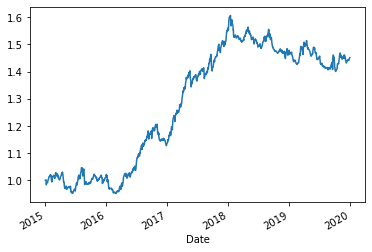

In [97]:
(1+strategy_df["ret"]).cumprod().plot()

In [100]:
strategy_df.index[2].year
    

2015

In [125]:
ret = {}
values = [-1,245,491,739,985,1227]
for j in range(5):
    temp = strategy_df.loc[strategy_df.index[values[j]+1]:strategy_df.index[values[j+1]]]
    yearly = []
    for i in names:
        yearly.append((temp[i] + 1).cumprod().tolist()[-1])
    ret[temp.index[1].year] = yearly
yearly_returns = pd.DataFrame.from_dict(ret)
yearly_returns.to_csv("yearlyreturns.csv")

In [110]:
print(strategy_df.loc[:strategy_df.index[245]])

            3MINDIA.NS    ACC.NS  AIAENG.NS  APLAPOLLO.NS  AUBANK.NS  \
Date                                                                   
2015-01-01         0.0  0.000000   0.000000      0.000000        NaN   
2015-01-02         0.0  0.000000   0.000000      0.000000        NaN   
2015-01-05         0.0  0.005435   0.004020     -0.027757        NaN   
2015-01-06         0.0 -0.034946  -0.037743      0.000000        NaN   
2015-01-07         0.0  0.000000   0.000000      0.000000        NaN   
...                ...       ...        ...           ...        ...   
2015-12-24         0.0  0.000000   0.000000     -0.018246        NaN   
2015-12-28         0.0  0.000000   0.000000     -0.015756        NaN   
2015-12-29         0.0  0.000000   0.000000     -0.005619        NaN   
2015-12-30         0.0  0.000000   0.000000     -0.006505        NaN   
2015-12-31         0.0  0.000000   0.000000     -0.008069        NaN   

            AARTIIND.NS  AAVAS.NS  ABBOTINDIA.NS  ADANIGAS.NS  

In [5]:
data["WELSPUNIND.NS"].to_csv("data.csv")